# Battery Data Cleaning

## PART A: EDA and Case Study

Our aim is to start by simple steps to figure out the case study, since we missed a documentation/report that comes generally along with the dataset, we will refer to plotting graphs in order to found the relations between different columns.

Our dataset contains some measured data for a battery, thus our external knowledge about batteries from real-world could be helpful to relate different categories, for example, battery temperature can affect the battery state of charge (SOC), as temperature can affect the rate of chemical reactions inside the battery.

In part A, we will start by importing needed libraries (some other may be imported later) and we will follow the below mentioned steps:

**1. Read Data**: Reading data with converting first column to an appropriate (datetime) format. \
**2. Study the data statistically:**

    This could be possible by doing the following steps:
        a. Describe data and vusializing graphs
        b. Check missing values and study their positioning
        c. Check for duplication
        d. Check datatypes (correctness and unity)
        e. Refer to datetime type in case of timeseries
        f. Check outliers/Invalidity of values
        g. Check for inconsistencies: Since we are not robots, any data that doesn't make sense in real-world must be dropped with justification 
**3. An interactive report that summarize all previous steps, that will be used for performing modifications on actual data**

In [1]:
#Import libraries
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Step a: Reading data
# Parse dates automatically to datetime format
data = pd.read_csv('battery_data_csv.csv', parse_dates=['datetime'])
# Print first 5 rows of the dataset
data.head()

,datetime,battery_voltage,battery_current,battery_state_of_charge,battery_temperature_1,battery_temperature_2
0,2022-12-21 00:05:00,47.959999,-45.400002,0.83,30.1,NaN
1,2022-12-21 00:15:00,47.990002,-45.400002,0.82,30.0,NaN
2,2022-12-21 00:25:00,47.939999,-45.400002,0.82,30.0,NaN
3,2022-12-21 00:35:00,47.880001,-45.400002,0.82,30.0,NaN
4,2022-12-21 00:45:00,47.790001,-45.400002,0.81,29.9,NaN


In [3]:
# Print last 5 elements in the dataset
data.tail()

,datetime,battery_voltage,battery_current,battery_state_of_charge,battery_temperature_1,battery_temperature_2
17470,2023-02-20 23:34:00,47.810001,-46.799999,NaN,33.900002,NaN
17471,2023-02-20 23:40:00,NaN,NaN,0.73,NaN,26.799999
17472,2023-02-20 23:44:00,47.810001,-46.799999,NaN,33.900002,NaN
17473,2023-02-20 23:50:00,NaN,NaN,0.73,NaN,26.500000
17474,2023-02-20 23:54:00,47.810001,-46.799999,NaN,33.900002,NaN


In [4]:
# Print the shape of the dataset: #row x #columns
data.shape

(17475, 6)

In [5]:
print('Columns in the dataset:')
for c in data.columns:
    print(c)

Columns in the dataset:
datetime
battery_voltage
battery_current
battery_state_of_charge
battery_temperature_1
battery_temperature_2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17475 entries, 0 to 17474
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   datetime                 17475 non-null  datetime64[ns]
 1   battery_voltage          8899 non-null   float64       
 2   battery_current          8893 non-null   float64       
 3   battery_state_of_charge  8833 non-null   float64       
 4   battery_temperature_1    8893 non-null   float64       
 5   battery_temperature_2    8638 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 819.3 KB


In [7]:
data.describe()

,battery_voltage,battery_current,battery_state_of_charge,battery_temperature_1,battery_temperature_2
count,8899.000000,8893.000000,8833.000000,8893.000000,8638.000000
mean,51.542721,-1.249545,0.821409,31.223333,28.239326
std,9.668542,55.939475,0.058284,3.190098,8.285521
min,43.209999,-51.200001,0.060000,24.299999,12.500000
25%,49.160000,-45.400002,0.800000,28.700001,21.400000
50%,52.299999,3.000000,0.840000,30.600000,26.900000
75%,53.490002,14.600000,0.850000,33.900002,35.400002
max,580.000000,2300.000000,0.950000,50.000000,48.900002


In [8]:
# Step 2: Some tables contain a small study of the data
# Check for missing values
missing_values = data.isnull().sum()
print('Missing values:\n', missing_values)

Missing values:
 datetime                      0
battery_voltage            8576
battery_current            8582
battery_state_of_charge    8642
battery_temperature_1      8582
battery_temperature_2      8837
dtype: int64


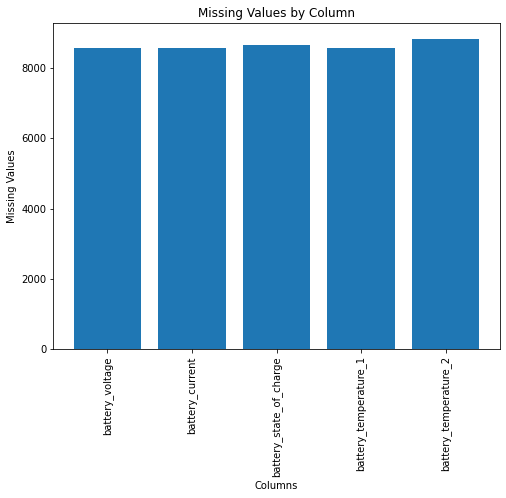

In [9]:
# Exclude the first column from the analysis
data_no_first = data.iloc[:, 1:]

# Calculate the missing values
missing_values = data_no_first.isnull().sum()

# Plot the missing values
plt.figure(figsize=(8,6))
plt.bar(missing_values.index, missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.title('Missing Values by Column')
plt.show()

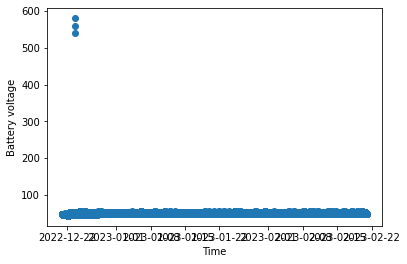

In [10]:
# Plot battery voltage vs time
plt.scatter(data['datetime'], data['battery_voltage'])
plt.xlabel('Time')
plt.ylabel('Battery voltage')
plt.show()

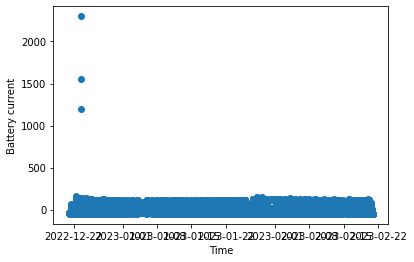

In [11]:
# Plot battery current vs time
plt.scatter(data['datetime'], data['battery_current'])
plt.xlabel('Time')
plt.ylabel('Battery current')
plt.show()

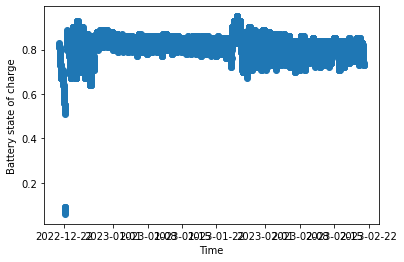

In [12]:
# Plot battery state of charge vs time
plt.scatter(data['datetime'], data['battery_state_of_charge'])
plt.xlabel('Time')
plt.ylabel('Battery state of charge')
plt.show()

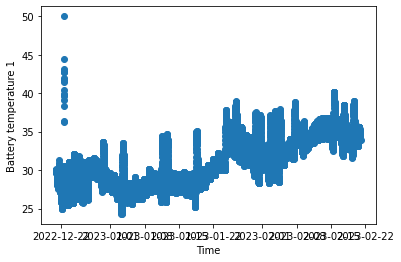

In [13]:
# Plot battery temperature 1 vs time
plt.scatter(data['datetime'], data['battery_temperature_1'])
plt.xlabel('Time')
plt.ylabel('Battery temperature 1')
plt.show()

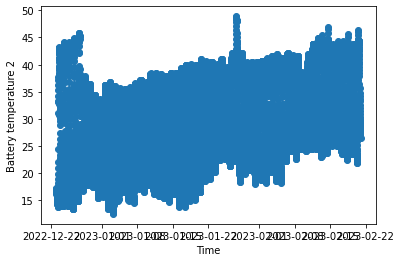

In [14]:
# Plot battery temperature 2 vs time
plt.scatter(data['datetime'], data['battery_temperature_2'])
plt.xlabel('Time')
plt.ylabel('Battery temperature 2')
plt.show()

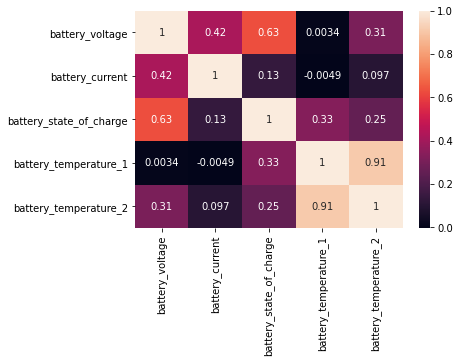

In [15]:
import seaborn as sns
# Step 5: Calculate correlation matrix for all variables
sns.heatmap(data.corr(), annot=True)
plt.show()

In [16]:
profile = ProfileReport(data,title='Battery Dataset Study Report - By Ali H.')
profile.to_file('Report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 96.04it/s]


In [17]:
#run it if you want to see the report here, it is already exported as html file.
profile.to_notebook_iframe()

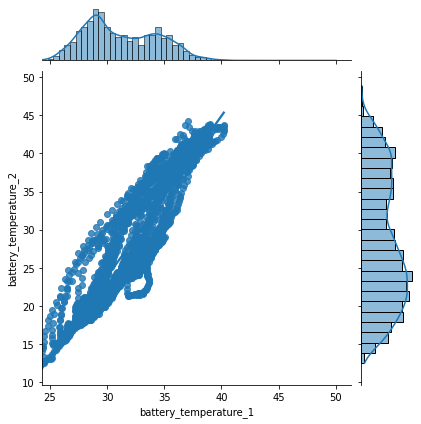

In [17]:
sns.jointplot(x='battery_temperature_1',y='battery_temperature_2',data=data,kind='reg')

In [18]:
# Calculate time difference between each row and its previous row
time_diffs = (data['datetime'] - data['datetime'].shift()).dropna()

# Count frequency of each unique time difference
time_diff_counts = time_diffs.value_counts()

# Print frequency of each unique time difference
print(time_diff_counts)

0 days 00:04:00    6423
0 days 00:06:00    6422
0 days 00:05:00    4285
0 days 00:10:00     317
0 days 00:00:00      13
0 days 00:03:00       7
0 days 00:02:00       3
0 days 00:01:00       3
0 days 07:00:00       1
Name: datetime, dtype: int64


### Conclusion of PART A

Referring to the profiling report, and the results shown above, we can conclude the following anomalies:

1- Duplicate values \
2- Outliers \
3- Missing values \
4- Time intervals is not regular

## PART B: Cleaning and processing data

As we have seen in PART A, some anomalies has been detected and here we will try to solve them one by one.

The order of anomalies mentioned above in the conclusion of PART A is not random has been chosen to have the best possible cleaning. \
We remove duplicate values first as they are useless data and affects the dataset. \
Then outliers because if we need to fill missing values and they are still present, we won't get efficient prediction/approximation of filled values. \
After resolving all previous anomalies, for missing values, we will use different techniques depending on the status and positioning of these values. \
Finally, we can start by solving the problem of irregularity of intervals, since some intervals are relatively long, we need to fill the gap.


All these steps are categorized below, along with their explanation.

### PART B-1: Remove duplicates

In [19]:
duplicates = data[data.duplicated()]
duplicates

,datetime,battery_voltage,battery_current,battery_state_of_charge,battery_temperature_1,battery_temperature_2
1428,2022-12-27 02:01:00,47.200001,-45.400002,NaN,28.299999,NaN
1429,2022-12-27 02:01:00,47.200001,-45.400002,NaN,28.299999,NaN
1433,2022-12-27 02:05:00,47.180000,-45.400002,NaN,28.299999,NaN
5881,2023-01-11 13:04:00,NaN,NaN,NaN,NaN,NaN
11596,2023-01-31 11:14:00,NaN,NaN,NaN,NaN,NaN
11642,2023-01-31 15:44:00,NaN,NaN,NaN,NaN,NaN


In [20]:
print(f"The size of dataset before removing duplicates is {data.shape}")
data = data.drop_duplicates()
print(f"The size of dataset after removing duplicates is {data.shape}")

The size of dataset before removing duplicates is (17475, 6)
The size of dataset after removing duplicates is (17469, 6)


### PART B-2: Remove Outliers

Outliers are data points that lie far away from the bulk of the data points. They can be caused by measurement errors, data entry errors, or natural variations in the data. Outliers can affect statistical measures such as the mean and standard deviation, and can distort the results of data analysis.

The z-method for removing outliers is a statistical technique used to identify and remove outliers from a dataset. It is based on the assumption that the distribution of the data is normal. The z-score is a measure of how many standard deviations a data point is away from the mean. Data points with a z-score greater than a certain threshold are considered outliers and can be removed from the dataset.

The steps to use the z-method for removing outliers are as follows:

1. Calculate the mean and standard deviation of the dataset.
2. Calculate the z-score for each data point using the formula ```z = (x - mean) / standard deviation.```
3. Determine a threshold value for the z-score beyond which data points are considered outliers. A commonly used threshold is 3, which corresponds to data points that are more than 3 standard deviations away from the mean.
4. Identify the data points that have a z-score greater than the threshold and remove them from the dataset.

**Note: This technique must be done to each column, the scatter plot with respect to time will be shown to prove efficiency of this method**

#### PART B-2-1: battery_voltage

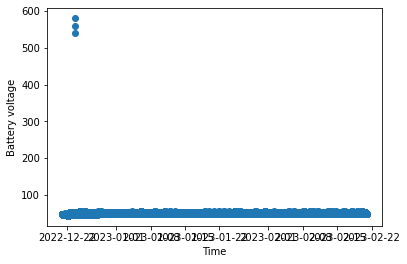

In [21]:
# Plot battery voltage vs time before removing outliers
plt.scatter(data['datetime'], data['battery_voltage'])
plt.xlabel('Time')
plt.ylabel('Battery voltage')
plt.show()

In [22]:
z_scores = (data['battery_voltage'] - data['battery_voltage'].mean()) / data['battery_voltage'].std()
threshold = 3
outliers = data['battery_voltage'][(z_scores >= threshold)]
print('Rows indicated as outliers:')
print(outliers)

# Remove outliers
print(f"\n Dataset size before removing outliers is {data.shape}")
data = data.drop(outliers.index)
print(f"\n Dataset size after removing outliers is {data.shape}")

Rows indicated as outliers:
414    540.0
416    560.0
418    580.0
Name: battery_voltage, dtype: float64

 Dataset size before removing outliers is (17469, 6)

 Dataset size after removing outliers is (17466, 6)


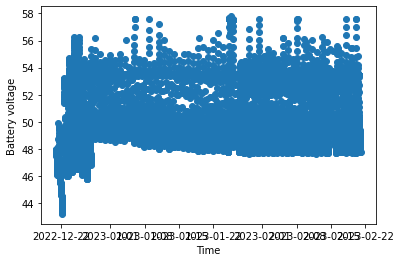

In [23]:
# Plot battery voltage vs time after removing outliers
plt.scatter(data['datetime'], data['battery_voltage'])
plt.xlabel('Time')
plt.ylabel('Battery voltage')
plt.show()

#### PART B-2-2: battery_current

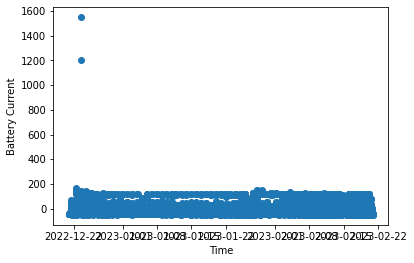

In [24]:
# Plot battery current vs time before removing outliers
plt.scatter(data['datetime'], data['battery_current'])
plt.xlabel('Time')
plt.ylabel('Battery Current')
plt.show()

In [25]:
z_scores = (data['battery_current'] - data['battery_current'].mean()) / data['battery_current'].std()
threshold = 3
outliers = data['battery_current'][(z_scores >= threshold)]
print('Rows indicated as outliers:')
print(outliers)

# Remove outliers
print(f"\n Dataset size before removing outliers is {data.shape}")
data = data.drop(outliers.index)
print(f"\n Dataset size after removing outliers is {data.shape}")

Rows indicated as outliers:
183       164.000000
410      1200.000000
412      1550.000000
10709     153.800003
10995     151.000000
Name: battery_current, dtype: float64

 Dataset size before removing outliers is (17466, 6)

 Dataset size after removing outliers is (17461, 6)


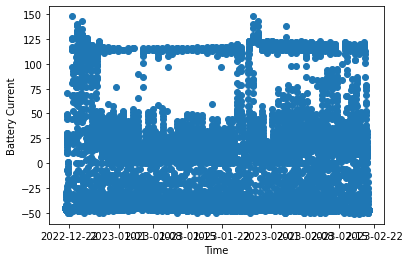

In [26]:
# Plot battery current vs time after removing outliers
plt.scatter(data['datetime'], data['battery_current'])
plt.xlabel('Time')
plt.ylabel('Battery Current')
plt.show()

#### PART B-2-3: battery_state_of_charge

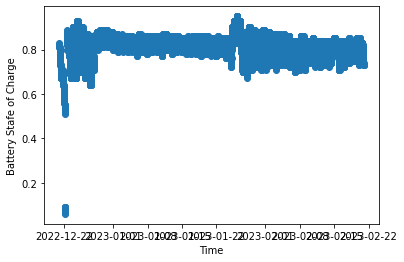

In [27]:
# Plot battery_state_of_charge vs time before removing outliers
plt.scatter(data['datetime'], data['battery_state_of_charge'])
plt.xlabel('Time')
plt.ylabel('Battery Stafe of Charge')
plt.show()

In [28]:
z_scores = (data['battery_state_of_charge'] - data['battery_state_of_charge'].mean()) / data['battery_state_of_charge'].std()
threshold = 3
outliers = data['battery_state_of_charge'][(z_scores >= threshold)]
print('Rows indicated as outliers:')
print(outliers)

# Remove outliers
print(f"\n Dataset size before removing outliers is {data.shape}")
data = data.drop(outliers.index)
print(f"\n Dataset size after removing outliers is {data.shape}")

Rows indicated as outliers:
Series([], Name: battery_state_of_charge, dtype: float64)

 Dataset size before removing outliers is (17461, 6)

 Dataset size after removing outliers is (17461, 6)


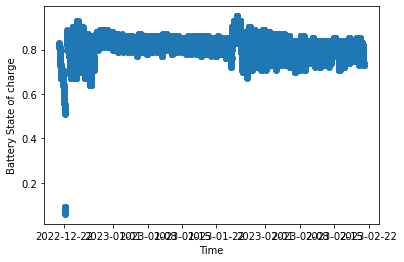

In [29]:
# Plot battery_state_of_charge vs time after removing outliers
plt.scatter(data['datetime'], data['battery_state_of_charge'])
plt.xlabel('Time')
plt.ylabel('Battery State of charge')
plt.show()

#### PART B-2-4: battery_temperature_1

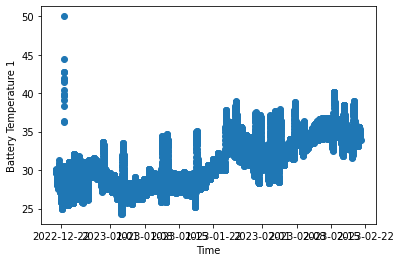

In [30]:
# Plot battery_temperature_1 vs time before removing outliers
plt.scatter(data['datetime'], data['battery_temperature_1'])
plt.xlabel('Time')
plt.ylabel('Battery Temperature 1')
plt.show()

In [31]:
z_scores = (data['battery_temperature_1'] - data['battery_temperature_1'].mean()) / data['battery_temperature_1'].std()
threshold = 3
outliers = data['battery_temperature_1'][(z_scores >= threshold)]
print('Rows indicated as outliers:')
print(outliers)

# Remove outliers
print(f"\n Dataset size before removing outliers is {data.shape}")
data = data.drop(outliers.index)
print(f"\n Dataset size after removing outliers is {data.shape}")

Rows indicated as outliers:
181    50.000000
182    44.400002
184    42.700001
185    41.700001
186    41.400002
195    42.700001
196    42.700001
197    42.000000
Name: battery_temperature_1, dtype: float64

 Dataset size before removing outliers is (17461, 6)

 Dataset size after removing outliers is (17453, 6)


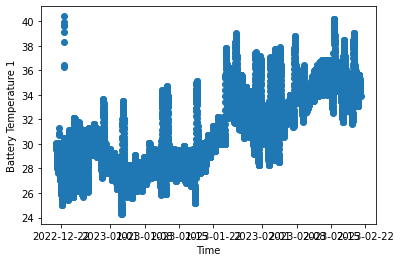

In [32]:
# Plot battery_temperature_1 vs time after removing outliers
plt.scatter(data['datetime'], data['battery_temperature_1'])
plt.xlabel('Time')
plt.ylabel('Battery Temperature 1')
plt.show()

#### PART B-2-5: battery_temperature_2

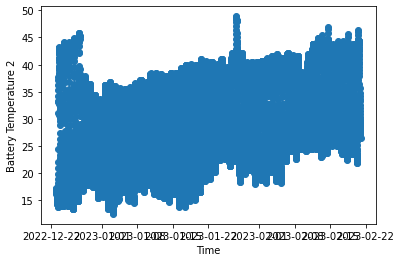

In [33]:
# Plot battery_temperature_2 vs time before removing outliers
plt.scatter(data['datetime'], data['battery_temperature_2'])
plt.xlabel('Time')
plt.ylabel('Battery Temperature 2')
plt.show()

In [34]:
z_scores = (data['battery_temperature_2'] - data['battery_temperature_2'].mean()) / data['battery_temperature_2'].std()
threshold = 3
outliers = data['battery_temperature_2'][(z_scores >= threshold)]
print('Rows indicated as outliers:')
print(outliers)

# Remove outliers
print(f"\n Dataset size before removing outliers is {data.shape}")
data = data.drop(outliers.index)
print(f"\n Dataset size after removing outliers is {data.shape}")

Rows indicated as outliers:
Series([], Name: battery_temperature_2, dtype: float64)

 Dataset size before removing outliers is (17453, 6)

 Dataset size after removing outliers is (17453, 6)


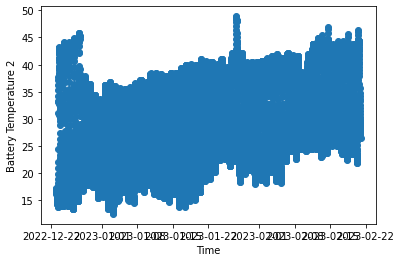

In [35]:
# Plot battery_temperature_2 vs time after removing outliers
plt.scatter(data['datetime'], data['battery_temperature_2'])
plt.xlabel('Time')
plt.ylabel('Battery Temperature 2')
plt.show()

In [36]:
data.shape

(17453, 6)

In [38]:
profile = ProfileReport(data,title='Battery Dataset Study Report - By Ali H.')
profile.to_file('Report2.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 147.97it/s]


**Interesting noticed change: Increase of correlation** 

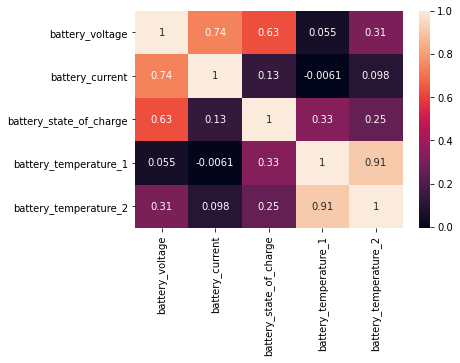

In [39]:
sns.heatmap(data.corr(), annot=True)
plt.show()

### PART B-3: Missing Values

After resolving all previous issue, we still have to deal with missing values.
Since our data is numerical, and it contains measurements of a battery in relatively small interval of times (Average of 5 minutes) 
We can simplify this step into two categories: 
1. A value is missing between two values that are present.
2. A long chain of missing values: Successive amount of rows with missing values (n>=2).

#### PART B-3-1: Missing value between two present values.

In this case, simply we can assign the average of previous and next values to replace the empty cell.

In [40]:
missing_values = data.isnull().sum()
print('Missing values before:\n', missing_values)

Missing values before:
 datetime                      0
battery_voltage            8572
battery_current            8579
battery_state_of_charge    8630
battery_temperature_1      8578
battery_temperature_2      8816
dtype: int64


In [41]:
data.reset_index(drop=True,inplace=True)

In [42]:
#An iterative process:
for i in range(1,len(data.columns)):
    for j in range(1,len(data[data.columns[i]])-1):
        if pd.isna(data[data.columns[i]][j])==True and pd.isna(data[data.columns[i]][j-1])==False and pd.isna(data[data.columns[i]][j+1])==False:
            avg=data[data.columns[i]][j+1]+data[data.columns[i]][j-1]
            avg=avg/2
            data[data.columns[i]][j]=avg


In [43]:
missing_values = data.isnull().sum()
print('Missing values after:\n', missing_values)

Missing values after:
 datetime                     0
battery_voltage             37
battery_current             63
battery_state_of_charge     85
battery_temperature_1       51
battery_temperature_2      265
dtype: int64


#### PART B-3-2: Successive missing values

The number of missing value is decreased to a reasonable amount for each column, but here the issue is that we cannot interpolate the missing values since they are not between two present values, and therefore the best approach to solve this problem is to use Linear Regression model to predict these values.

We can notice that the correlation between battery_current and battery_voltage is high, thus we can predict one from the other.

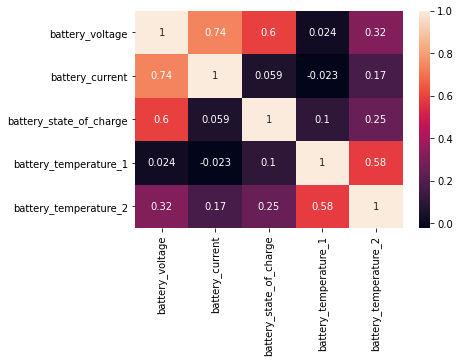

In [44]:
sns.heatmap(data.corr(), annot=True)
plt.show()

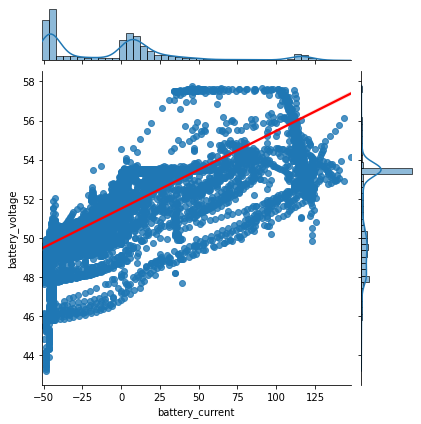

In [45]:
sns.jointplot(x='battery_current',y='battery_voltage',data=data,kind='reg',line_kws={'color':'red'})

Before start building our regression model, let's find how much rows to we have where both Battery Voltage and Battery Current are null.

In [46]:
data[data['battery_voltage'].isna() & data['battery_current'].isna()].shape

(37, 6)

It seems that the number of rows is equal to the number of rows of null 'Battery Voltage', so this approach won't be efficient and we need to find another way - To establish a statistical relation between Current and Voltage. \
Simply because when we want to predict any target, it is impossible to happen without an input. 
Another possible way is to predict these two columns using other columns.

1. For Battery Voltage we can refer to SOC and Battery_Temperature 2.
2. For Current Voltage instead, when we get battery voltage, we can come back to predict the current.

#### PART B-3-2-1: Predict missing values of Battery Voltage

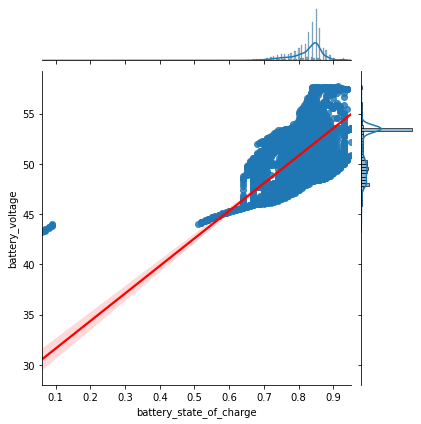

In [47]:
sns.jointplot(x='battery_state_of_charge',y='battery_voltage',data=data,kind='reg',line_kws={'color':'red'})

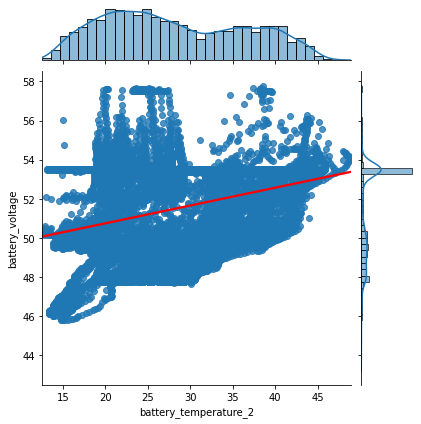

In [48]:
sns.jointplot(x='battery_temperature_2',y='battery_voltage',data=data,kind='reg',line_kws={'color':'red'})

In [49]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load CSV file into a pandas DataFrame
df = data[data['battery_temperature_2'].notna() & data['battery_voltage'].notna() & data['battery_state_of_charge'].notna() ]

# Split the data into training and testing sets (70/20 split)
train = df.sample(frac=0.7, random_state=1)
test = df.drop(train.index)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(train[['battery_temperature_2','battery_state_of_charge']], train['battery_voltage'])

# Use the model to predict the missing values in the test data
predictions = model.predict(test[['battery_temperature_2','battery_state_of_charge']])

test['battery_voltage_predicted'] = predictions

from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = mean_squared_error(test['battery_voltage'], test['battery_voltage_predicted'])

print(f"Mean Squared Error: {mse}")

# Use the trained model to predict the missing values in the original DataFrame
df['battery_voltage_predicted'] = model.predict(df[['battery_temperature_2','battery_state_of_charge']])

# Access the coefficients and the intercept
coefficients = model.coef_
intercept = model.intercept_

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

for i,row in enumerate(data['battery_voltage']):
    if pd.isna(row):
        data['battery_voltage'][i] =  data['battery_temperature_2'][i]*coefficients[0] + data['battery_state_of_charge'][i]*coefficients[1] + intercept

Mean Squared Error: 3.6181906286917727
Coefficients: [ 0.0526979  27.83816877]
Intercept: 27.0184661222031


In [50]:
missing_values = data.isnull().sum()
print('Missing values after:\n', missing_values)

Missing values after:
 datetime                     0
battery_voltage              9
battery_current             63
battery_state_of_charge     85
battery_temperature_1       51
battery_temperature_2      265
dtype: int64


**The problem is solved for battery_voltage: Reducing missing values from 37 to 9**

#### PART B-3-2-2: Predict missing values of Current Voltage

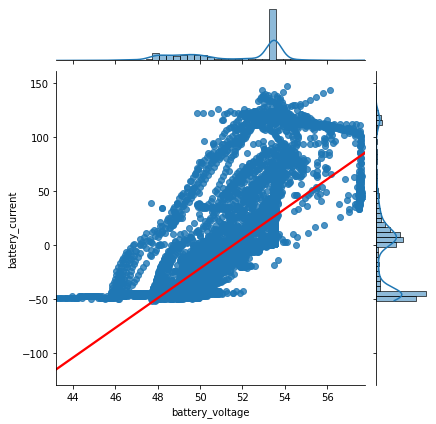

In [51]:
sns.jointplot(x='battery_voltage',y='battery_current',data=data,kind='reg',line_kws={'color':'red'})

In [52]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load CSV file into a pandas DataFrame
df = data[data['battery_current'].notna() & data['battery_voltage'].notna()]

# Split the data into training and testing sets (70/20 split)
train = df.sample(frac=0.7, random_state=1)
test = df.drop(train.index)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(train[['battery_voltage']], train['battery_current'])

# Use the model to predict the missing values in the test data
predictions = model.predict(test[['battery_voltage']])

test['battery_current_predicted'] = predictions

from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = mean_squared_error(test['battery_current'], test['battery_current_predicted'])

print(f"Mean Squared Error: {mse}")

# Use the trained model to predict the missing values in the original DataFrame
df['battery_current_predicted'] = model.predict(df[['battery_voltage']])


# Access the coefficients and the intercept
coefficients = model.coef_
intercept = model.intercept_

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

for i,row in enumerate(data['battery_current']):
    if pd.isna(row):
        data['battery_current'][i] =  data['battery_voltage'][i]*coefficients[0] + intercept

Mean Squared Error: 946.3260120457686
Coefficients: [13.91579015]
Intercept: -717.2976398726914


In [53]:
missing_values = data.isnull().sum()
print('Missing values after:\n', missing_values)

Missing values after:
 datetime                     0
battery_voltage              9
battery_current              9
battery_state_of_charge     85
battery_temperature_1       51
battery_temperature_2      265
dtype: int64


**The problem is solved for battery_voltage: Reducing missing values from 63 to 9**

#### PART B-3-2-3: Predict missing values of Temperature 2

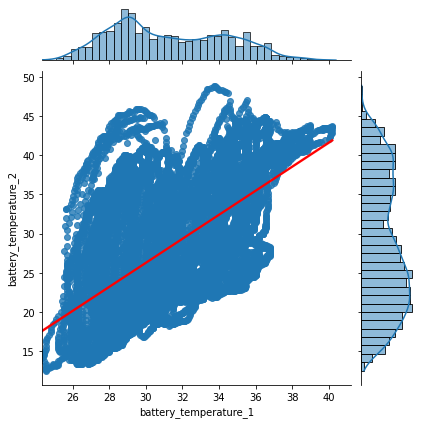

In [54]:
sns.jointplot(x='battery_temperature_1',y='battery_temperature_2',data=data,kind='reg',line_kws={'color':'red'})

In [55]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load CSV file into a pandas DataFrame
df = data[data['battery_temperature_2'].notna() & data['battery_temperature_1'].notna() & data['battery_voltage'].notna() ]

# Split the data into training and testing sets (80/20 split)
train = df.sample(frac=0.7, random_state=1)
test = df.drop(train.index)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(train[['battery_temperature_1','battery_voltage']], train['battery_temperature_2'])

# Use the model to predict the missing values in the test data
predictions = model.predict(test[['battery_temperature_1','battery_voltage']])

test['battery_temperature_2_predicted'] = predictions

from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = mean_squared_error(test['battery_temperature_2'], test['battery_temperature_2_predicted'])

print(f"Mean Squared Error: {mse}")

# Use the trained model to predict the missing values in the original DataFrame
df['battery_temperature_2_predicted'] = model.predict(df[['battery_temperature_1','battery_voltage']])

# Access the coefficients and the intercept
coefficients = model.coef_
intercept = model.intercept_

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

for i,row in enumerate(data['battery_temperature_2']):
    if pd.isna(row):
        data['battery_temperature_2'][i] =  data['battery_temperature_1'][i]*coefficients[0] + data['battery_voltage'][i]*coefficients[1] + intercept

Mean Squared Error: 38.71581700791278
Coefficients: [1.5383065  1.13214308]
Intercept: -78.15330328880468


In [56]:
missing_values = data.isnull().sum()
print('Missing values after:\n', missing_values)

Missing values after:
 datetime                    0
battery_voltage             9
battery_current             9
battery_state_of_charge    85
battery_temperature_1      51
battery_temperature_2       9
dtype: int64


**The problem is solved for battery_temperature_2: Reducing missing values from 265 to 9**

#### PART B-3-2-4: Predict missing values of State of Charge

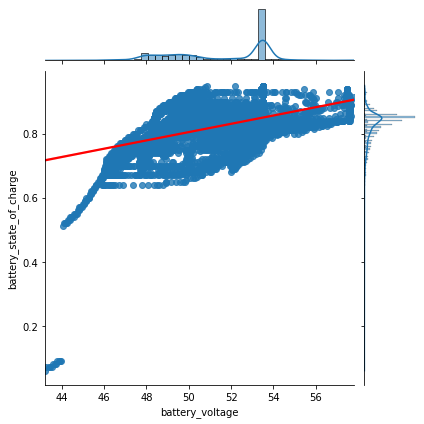

In [57]:
sns.jointplot(x='battery_voltage',y='battery_state_of_charge',data=data,kind='reg',line_kws={'color':'red'})

In [58]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load CSV file into a pandas DataFrame
df = data[data['battery_temperature_2'].notna() & data['battery_state_of_charge'].notna() & data['battery_voltage'].notna() ]

# Split the data into training and testing sets (70/20 split)
train = df.sample(frac=0.7, random_state=1)
test = df.drop(train.index)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(train[['battery_temperature_2','battery_voltage']], train['battery_state_of_charge'])

# Use the model to predict the missing values in the test data
predictions = model.predict(test[['battery_temperature_2','battery_voltage']])

test['battery_state_of_charge_predicted'] = predictions

from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = mean_squared_error(test['battery_state_of_charge'], test['battery_state_of_charge_predicted'])

print(f"Mean Squared Error: {mse}")

# Use the trained model to predict the missing values in the original DataFrame
df['battery_state_of_charge_predicted'] = model.predict(df[['battery_temperature_2','battery_voltage']])

# Access the coefficients and the intercept
coefficients = model.coef_
intercept = model.intercept_

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

for i,row in enumerate(data['battery_state_of_charge']):
    if pd.isna(row):
        data['battery_state_of_charge'][i] =  data['battery_temperature_2'][i]*coefficients[0] + data['battery_voltage'][i]*coefficients[1] + intercept

Mean Squared Error: 0.0020705716683481912
Coefficients: [0.00052995 0.01213022]
Intercept: 0.18481733569909153


In [59]:
missing_values = data.isnull().sum()
print('Missing values after:\n', missing_values)

Missing values after:
 datetime                    0
battery_voltage             9
battery_current             9
battery_state_of_charge     9
battery_temperature_1      51
battery_temperature_2       9
dtype: int64


**The problem is solved for battery_voltage: Reducing missing values from 85 to 9**

#### PART B-3-2-5: Predict missing values of Temperature 1

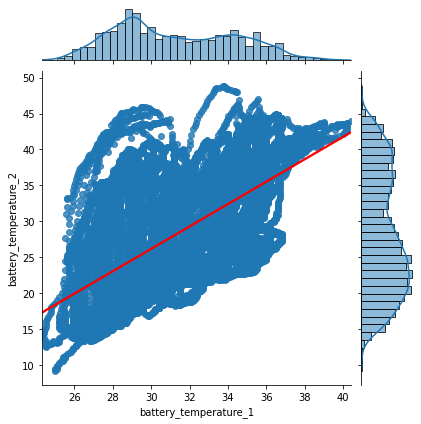

In [60]:
sns.jointplot(x='battery_temperature_1',y='battery_temperature_2',data=data,kind='reg',line_kws={'color':'red'})

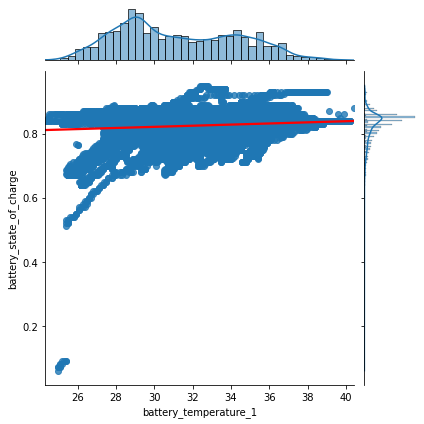

In [61]:
sns.jointplot(x='battery_temperature_1',y='battery_state_of_charge',data=data,kind='reg',line_kws={'color':'red'})

In [62]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load CSV file into a pandas DataFrame
df = data[data['battery_temperature_2'].notna() & data['battery_temperature_1'].notna() & data['battery_state_of_charge'].notna() ]

# Split the data into training and testing sets (80/20 split)
train = df.sample(frac=0.7, random_state=1)
test = df.drop(train.index)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(train[['battery_temperature_2','battery_voltage','battery_state_of_charge']], train['battery_temperature_1'])

# Use the model to predict the missing values in the test data
predictions = model.predict(test[['battery_temperature_2','battery_voltage','battery_state_of_charge']])

test['battery_temperature_1_predicted'] = predictions

from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = mean_squared_error(test['battery_temperature_1'], test['battery_temperature_1_predicted'])

print(f"Mean Squared Error: {mse}")

# Use the trained model to predict the missing values in the original DataFrame
df['battery_temperature_1_predicted'] = model.predict(df[['battery_temperature_2','battery_voltage','battery_state_of_charge']])

# Access the coefficients and the intercept
coefficients = model.coef_
intercept = model.intercept_

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

for i,row in enumerate(data['battery_temperature_1']):
    if pd.isna(row):
        data['battery_temperature_1'][i] =  data['battery_temperature_2'][i]*coefficients[0] + data['battery_voltage'][i]*coefficients[1] + data['battery_state_of_charge'][i]*coefficients[2] + intercept

Mean Squared Error: 6.178443129534069
Coefficients: [ 0.24959279 -0.31349231  3.64698157]
Intercept: 37.365478651463675


In [63]:
missing_values = data.isnull().sum()
print('Missing values after:\n', missing_values)

Missing values after:
 datetime                   0
battery_voltage            9
battery_current            9
battery_state_of_charge    9
battery_temperature_1      7
battery_temperature_2      9
dtype: int64


**The problem is solved for battery_voltage: Reducing missing values from 51 to 9**

#### PART B-3-2-6: Remaining missing values

The remaining 9 rows, are all without values, and therefore we can remove them directly.

In [64]:
data.shape

(17453, 6)

In [65]:
data[data['battery_voltage'].isna()]

,datetime,battery_voltage,battery_current,battery_state_of_charge,battery_temperature_1,battery_temperature_2
10975,2023-01-29 08:44:00,NaN,NaN,NaN,32.599998,NaN
10976,2023-01-29 08:54:00,NaN,NaN,NaN,32.799999,NaN
11574,2023-01-31 11:13:00,NaN,NaN,NaN,NaN,NaN
11575,2023-01-31 11:14:00,NaN,NaN,NaN,NaN,NaN
11576,2023-01-31 11:17:00,NaN,NaN,NaN,NaN,NaN
11578,2023-01-31 11:24:00,NaN,NaN,NaN,NaN,NaN
11579,2023-01-31 11:27:00,NaN,NaN,NaN,NaN,NaN
11581,2023-01-31 11:30:00,NaN,NaN,NaN,NaN,NaN
11582,2023-01-31 11:34:00,NaN,NaN,NaN,NaN,NaN


In [66]:
data.dropna(inplace=True)

In [67]:
data.shape

(17444, 6)

### PART B-4: Intervals irregularity

One of the most critical issues in timeseries data, is to have a long gap between two consecutive measurements, in this case, we need to fill the gap by interpolating according to fixed interval. \
We will assume that our interval is 5 minutes

In [68]:
data.shape

(17444, 6)

In [69]:
# Calculate time difference between each row and its previous row
time_diffs = (data['datetime'] - data['datetime'].shift()).dropna()

# Count frequency of each unique time difference
time_diff_counts = time_diffs.value_counts()

# Print frequency of each unique time difference
print(time_diff_counts)

0 days 00:04:00    6418
0 days 00:06:00    6418
0 days 00:05:00    4275
0 days 00:10:00     316
0 days 00:00:00       6
0 days 00:02:00       3
0 days 00:03:00       2
0 days 00:01:00       2
0 days 08:00:00       1
0 days 00:40:00       1
0 days 00:20:00       1
Name: datetime, dtype: int64


We have 4 anomalies in datatime column:
1. We have 7 2-consecutive rows with same datetime 
2. We have a gap of 20 minutes between two consecutive rows
3. We have a gap of 40 minutes between two consecutive rows
4. We have 8 hours gap between two consecutive rows

To solve these problems we will average values in case (1), and interpolate intervals in case (2) and (3) and (4).


#### PART B-4-1: Case 1 - Consecutive rows with same datetime (duplication of datetime)

In [70]:
# Group the DataFrame by the 'datetime' column and take the mean of the other columns
df = data.groupby('datetime').mean()

# Reset the index to convert the 'datetime' column back to a regular column
df = df.reset_index()

data = df

data

,datetime,battery_voltage,battery_current,battery_state_of_charge,battery_temperature_1,battery_temperature_2
0,2022-12-21 00:05:00,47.959999,-45.400002,0.830000,30.100000,22.447304
1,2022-12-21 00:15:00,47.990002,-45.400002,0.820000,30.000000,22.327440
2,2022-12-21 00:25:00,47.939999,-45.400002,0.820000,30.000000,22.270829
3,2022-12-21 00:35:00,47.880001,-45.400002,0.820000,30.000000,22.202904
4,2022-12-21 00:45:00,47.790001,-45.400002,0.810000,29.900000,21.947179
...,...,...,...,...,...,...
17433,2023-02-20 23:34:00,47.810001,-46.799999,0.730000,33.900002,26.799999
17434,2023-02-20 23:40:00,47.810001,-46.799999,0.730000,33.900002,26.799999
17435,2023-02-20 23:44:00,47.810001,-46.799999,0.730000,33.900002,26.650000
17436,2023-02-20 23:50:00,47.810001,-46.799999,0.730000,33.900002,26.500000


If we re-run the cell for computing the difference in datetime again, we found that we solved the problem easily.

In [71]:
# Calculate time difference between each row and its previous row
time_diffs = (data['datetime'] - data['datetime'].shift()).dropna()

# Count frequency of each unique time difference
time_diff_counts = time_diffs.value_counts()

# Print frequency of each unique time difference
print(time_diff_counts)

0 days 00:04:00    6418
0 days 00:06:00    6418
0 days 00:05:00    4275
0 days 00:10:00     316
0 days 00:02:00       3
0 days 00:03:00       2
0 days 00:01:00       2
0 days 08:00:00       1
0 days 00:40:00       1
0 days 00:20:00       1
Name: datetime, dtype: int64


#### PART B-4-2: Case 2, 3 and 4 - Consecutive rows with long gap

In [72]:
#Case 2
dts = data['datetime']
for i in range(len(dts)-1):
    x = dts[i+1]-dts[i]
    if x.seconds == 20*60:
        i1=i
        i2=i+1
        dt1=dts[i]
        dt2=dts[i+1]
        break
        
index = pd.date_range(start=dt1, end=dt2, freq='5T')
df = pd.DataFrame(index=index)
for i in range(len(data.columns)):
    if i!=0:
        x = np.linspace(data[data.columns[i]].loc[i1],data[data.columns[i]].loc[i2],len(df))
        x_list=x.tolist()
        df[data.columns[i]]=x_list
        
df.reset_index(inplace=True)
df = df.rename(columns={'index': 'datetime'})
df = df.drop(index=[0, len(df)-1])
df1 = data

# # slice df1 to get the rows up to the start index
df1_before = df1.iloc[:i2]

# # slice df1 to get the rows from the start index onwards
df1_after = df1.iloc[i2:]

# # concatenate df1_before, df, and df1_after
data = pd.concat([df1_before, df, df1_after], ignore_index=True)

In [73]:
#Case 3
dts = data['datetime']
for i in range(len(dts)-1):
    x = dts[i+1]-dts[i]
    if x.seconds == 40*60:
        i1=i
        i2=i+1
        dt1=dts[i]
        dt2=dts[i+1]
        break
        
index = pd.date_range(start=dt1, end=dt2, freq='5T')
df = pd.DataFrame(index=index)
for i in range(len(data.columns)):
    if i!=0:
        x = np.linspace(data[data.columns[i]].loc[i1],data[data.columns[i]].loc[i2],len(df))
        x_list=x.tolist()
        df[data.columns[i]]=x_list
        
df.reset_index(inplace=True)
df = df.rename(columns={'index': 'datetime'})
df = df.drop(index=[0, len(df)-1])
df1 = data

# # slice df1 to get the rows up to the start index
df1_before = df1.iloc[:i2]

# # slice df1 to get the rows from the start index onwards
df1_after = df1.iloc[i2:]

# # concatenate df1_before, df, and df1_after
data = pd.concat([df1_before, df, df1_after], ignore_index=True)

In [74]:
#Case 4
dts = data['datetime']
for i in range(len(dts)-1):
    x = dts[i+1]-dts[i]
    if x.seconds == 8*3600:
        i1=i
        i2=i+1
        dt1=dts[i]
        dt2=dts[i+1]
        break
        
index = pd.date_range(start=dt1, end=dt2, freq='5T')
df = pd.DataFrame(index=index)
for i in range(len(data.columns)):
    if i!=0:
        x = np.linspace(data[data.columns[i]].loc[i1],data[data.columns[i]].loc[i2],len(df))
        x_list=x.tolist()
        df[data.columns[i]]=x_list
        
df.reset_index(inplace=True)
df = df.rename(columns={'index': 'datetime'})
df = df.drop(index=[0, len(df)-1])
df1 = data

# # slice df1 to get the rows up to the start index
df1_before = df1.iloc[:i2]

# # slice df1 to get the rows from the start index onwards
df1_after = df1.iloc[i2:]

# # concatenate df1_before, df, and df1_after
data = pd.concat([df1_before, df, df1_after], ignore_index=True)

If we re-run the cell for computing the difference in datetime again, we found that we solved the problem easily.

In [75]:
# Calculate time difference between each row and its previous row
time_diffs = (data['datetime'] - data['datetime'].shift()).dropna()

# Count frequency of each unique time difference
time_diff_counts = time_diffs.value_counts()

# Print frequency of each unique time difference
print(time_diff_counts)

0 days 00:04:00    6418
0 days 00:06:00    6418
0 days 00:05:00    4383
0 days 00:10:00     316
0 days 00:02:00       3
0 days 00:03:00       2
0 days 00:01:00       2
Name: datetime, dtype: int64


### Conclusion of PART B

Now, our data is fully clean, and ready to be use. We are sure and confident that the results taken from this dataset will have a great influence for understanding and forecasting the behaviour of the battery.
When you have a model to build, spend 70% of your time on your data, and 30% to build the model, the performance comes from a clean and well analyzed data.

## PART C: Q&A

### PART C-1:

#### Average Battery Percentage: the average battery percentage for each day.

In [76]:
data['date'] = data['datetime'].dt.date
data['soc_percentage']=data['battery_state_of_charge']*100
grouped = data.groupby('date')['soc_percentage'].mean()
grouped

date
2022-12-21    69.972222
2022-12-22    55.621358
2022-12-23    78.553003
2022-12-24    79.894325
2022-12-25    80.520833
                ...    
2023-02-16    79.270833
2023-02-17    78.967971
2023-02-18    80.123263
2023-02-19    81.254355
2023-02-20    79.994676
Name: soc_percentage, Length: 62, dtype: float64

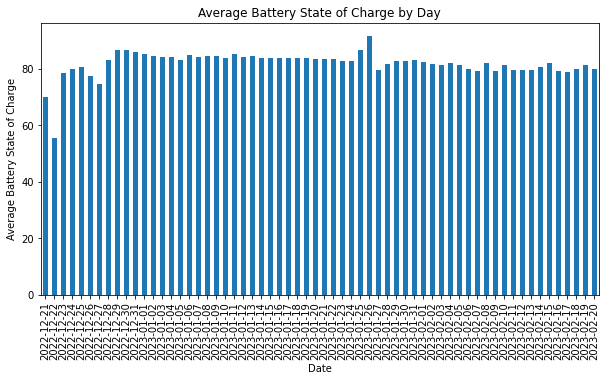

In [77]:
grouped.plot(kind='bar', y='avg_bat_soc', figsize=(10,5))
plt.title('Average Battery State of Charge by Day')
plt.xlabel('Date')
plt.ylabel('Average Battery State of Charge')
plt.show()

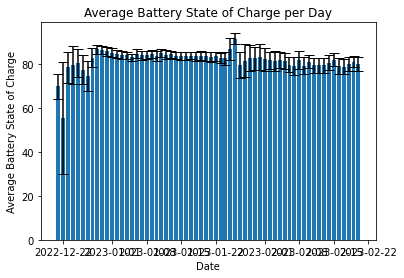

In [78]:
# calculate mean and std for each day
daily_mean = data.groupby('date')['soc_percentage'].mean()
daily_std = data.groupby('date')['soc_percentage'].std()

# plot bar plot with error bars
fig, ax = plt.subplots()
ax.bar(daily_mean.index, daily_mean.values, yerr=daily_std.values, capsize=5)
ax.set_xlabel('Date')
ax.set_ylabel('Average Battery State of Charge')
ax.set_title('Average Battery State of Charge per Day')
plt.show()

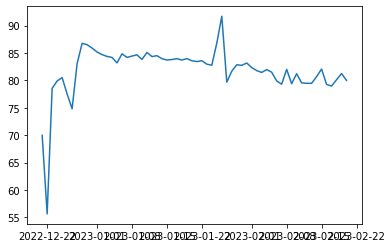

In [79]:
plt.plot(grouped)

#### Average Battery Temperature: the average battery temperature for each day.

Here, we assumed that average battery temperature is the average between battery temperature 1 and battery temperature 2

In [80]:
data['date'] = data['datetime'].dt.date
data['avg_temp']=data['battery_temperature_1']+data['battery_temperature_2']/2
grouped = data.groupby('date')['avg_temp'].mean()
grouped

date
2022-12-21    37.787640
2022-12-22    40.871890
2022-12-23    40.517260
2022-12-24    41.560590
2022-12-25    41.484636
                ...    
2023-02-16    52.131653
2023-02-17    51.106757
2023-02-18    50.865747
2023-02-19    50.916101
2023-02-20    50.942601
Name: avg_temp, Length: 62, dtype: float64

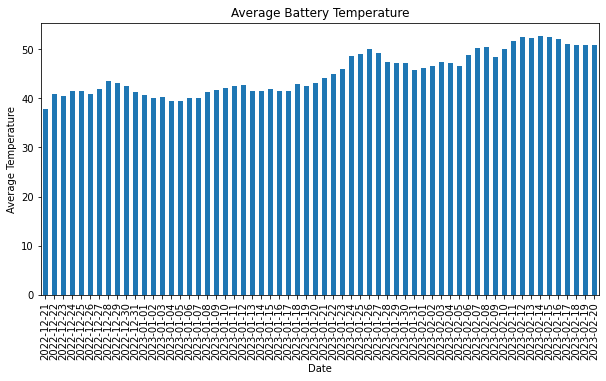

In [81]:
grouped.plot(kind='bar', y='avg_bat_soc', figsize=(10,5))
plt.title('Average Battery Temperature')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.show()

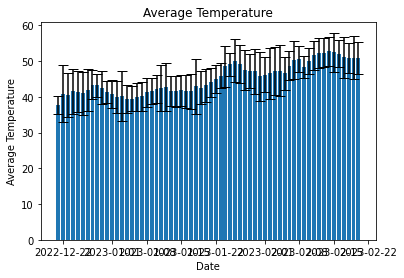

In [82]:
# calculate mean and std for each day
daily_mean = data.groupby('date')['avg_temp'].mean()
daily_std = data.groupby('date')['avg_temp'].std()

# plot bar plot with error bars
fig, ax = plt.subplots()
ax.bar(daily_mean.index, daily_mean.values, yerr=daily_std.values, capsize=5)
ax.set_xlabel('Date')
ax.set_ylabel('Average Temperature')
ax.set_title('Average Temperature')
plt.show()

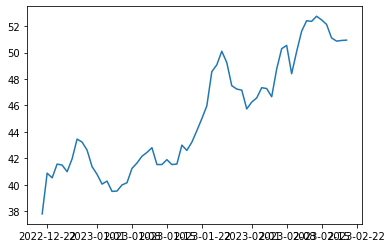

In [83]:
plt.plot(grouped)

#### Average Battery Voltage: the average battery voltage for each day.

In [84]:
data['date'] = data['datetime'].dt.date
grouped = data.groupby('date')['battery_voltage'].mean()
grouped

date
2022-12-21    46.855000
2022-12-22    47.574923
2022-12-23    49.362528
2022-12-24    50.050747
2022-12-25    50.007899
                ...    
2023-02-16    50.705085
2023-02-17    50.584171
2023-02-18    50.975378
2023-02-19    50.836423
2023-02-20    50.919552
Name: battery_voltage, Length: 62, dtype: float64

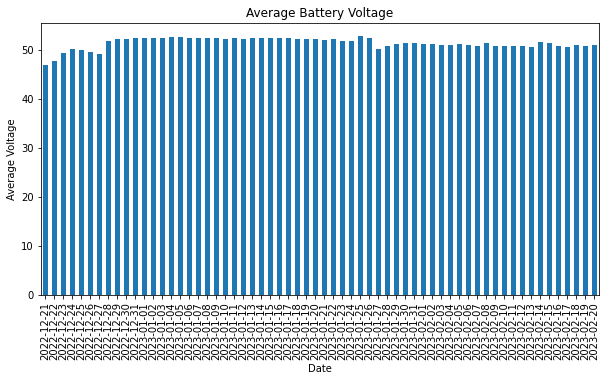

In [85]:
grouped.plot(kind='bar', y='avg_bat_volt', figsize=(10,5))
plt.title('Average Battery Voltage')
plt.xlabel('Date')
plt.ylabel('Average Voltage')
plt.show()

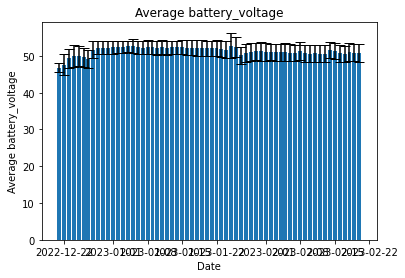

In [86]:
# calculate mean and std for each day
daily_mean = data.groupby('date')['battery_voltage'].mean()
daily_std = data.groupby('date')['battery_voltage'].std()

# plot bar plot with error bars
fig, ax = plt.subplots()
ax.bar(daily_mean.index, daily_mean.values, yerr=daily_std.values, capsize=5)
ax.set_xlabel('Date')
ax.set_ylabel('Average battery_voltage')
ax.set_title('Average battery_voltage')
plt.show()

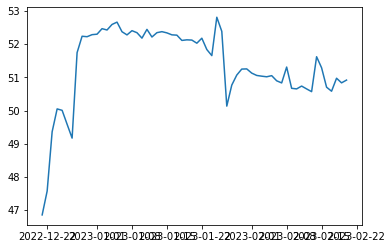

In [87]:
plt.plot(grouped)

#### Average Battery Current: the average battery current for each day.

In [88]:
data['date'] = data['datetime'].dt.date
grouped = data.groupby('date')['battery_current'].mean()
grouped

date
2022-12-21   -28.784723
2022-12-22   -11.693368
2022-12-23    -0.242156
2022-12-24     2.700516
2022-12-25    -1.801839
                ...    
2023-02-16    -2.675809
2023-02-17    -0.442487
2023-02-18     3.944218
2023-02-19   -10.162122
2023-02-20    -1.054834
Name: battery_current, Length: 62, dtype: float64

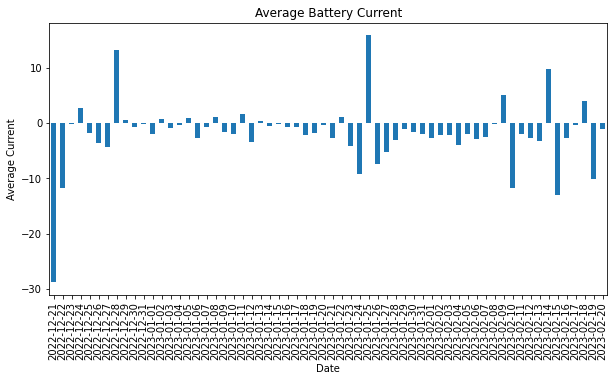

In [89]:
grouped.plot(kind='bar', y='avg_bat_curr', figsize=(10,5))
plt.title('Average Battery Current')
plt.xlabel('Date')
plt.ylabel('Average Current')
plt.show()

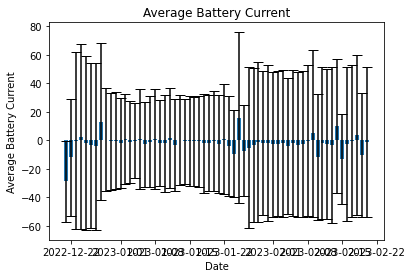

In [90]:
# calculate mean and std for each day
daily_mean = data.groupby('date')['battery_current'].mean()
daily_std = data.groupby('date')['battery_current'].std()

# plot bar plot with error bars
fig, ax = plt.subplots()
ax.bar(daily_mean.index, daily_mean.values, yerr=daily_std.values, capsize=5)
ax.set_xlabel('Date')
ax.set_ylabel('Average Battery Current')
ax.set_title('Average Battery Current')
plt.show()

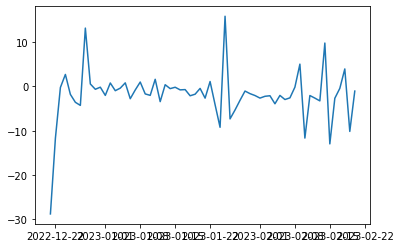

In [91]:
plt.plot(grouped)

#### Daily Battery Usage: The amount of battery used each day.

To determine the usage of a battery in a day, is by taking the **minimum recorded state of charge** on that day. Because, when the battery is fully charged, it is 100& (State of charge in %), when I use 80% ot the battery it means that there is a moment where the measurement ```detects state_of_charge=0.2```

Therefore I should plot ```100- SOC%```

In [92]:
data['date'] = data['datetime'].dt.date
grouped = data.groupby('date')['soc_percentage'].min()
grouped = 100-grouped
grouped

date
2022-12-21    42.000002
2022-12-22    94.000000
2022-12-23    32.999998
2022-12-24    32.999998
2022-12-25    30.000001
                ...    
2023-02-16    29.000002
2023-02-17    27.999997
2023-02-18    25.000000
2023-02-19    25.999999
2023-02-20    26.999998
Name: soc_percentage, Length: 62, dtype: float64

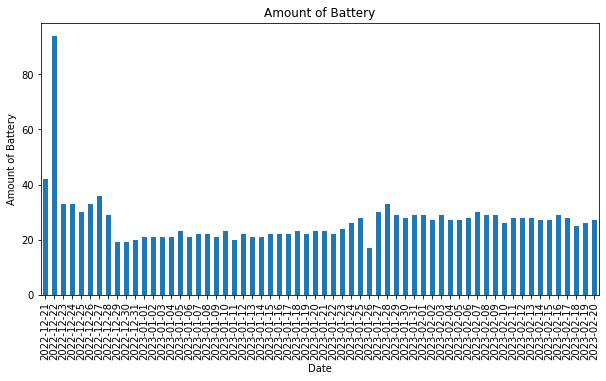

In [93]:
grouped.plot(kind='bar', y='avg_bat_consump', figsize=(10,5))
plt.title('Amount of Battery')
plt.xlabel('Date')
plt.ylabel('Amount of Battery')
plt.show()

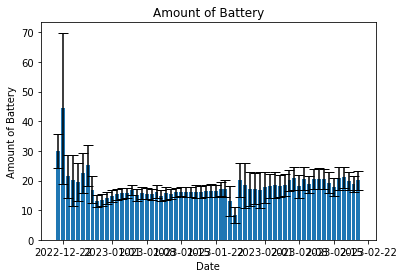

In [94]:
# calculate mean and std for each day
data['soc_100_perc']=100-data['soc_percentage']
daily_mean = data.groupby('date')['soc_100_perc'].mean()
daily_std = data.groupby('date')['soc_100_perc'].std()

# plot bar plot with error bars
fig, ax = plt.subplots()
ax.bar(daily_mean.index, daily_mean.values, yerr=daily_std.values, capsize=5)
ax.set_xlabel('Date')
ax.set_ylabel('Amount of Battery')
ax.set_title('Amount of Battery')
plt.show()

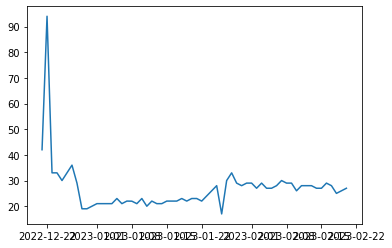

In [95]:
plt.plot(grouped)

#### Battery Runtime: The total time the battery is used per day.

To determine it, simply after grouping by date, we need to find the intervals of time where the SOC of the battery is NOT constant

In [96]:
#NO ANSWER

### PART C-2:

####     a. How does the battery usage change over time?
####    b. How does the battery health change over time?
####    c. How does the battery temperature affect battery usage?


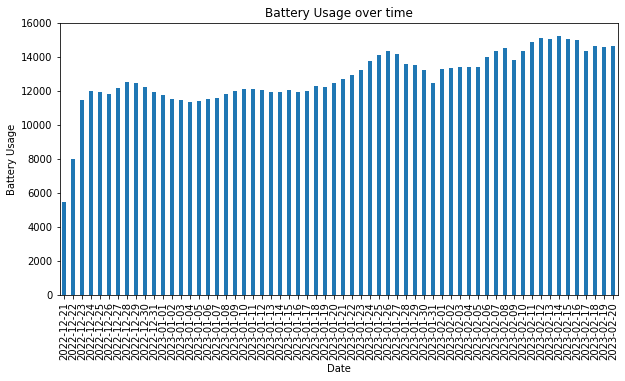

In [97]:
grouped=data.groupby('date')['avg_temp'].sum() 
grouped.plot(kind='bar', y='avg_bat_temp', figsize=(10,5))
plt.title('Battery Usage over time')
plt.xlabel('Date')
plt.ylabel('Battery Usage')
plt.show()

####    d. What is the average daily battery usage, and is it consistent?

In [98]:
data['date'] = data['datetime'].dt.date
grouped = data.groupby('date')['soc_percentage'].mean()
grouped = 100- grouped

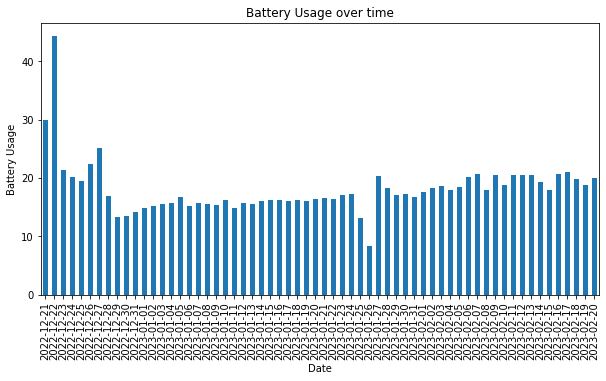

In [99]:
grouped.plot(kind='bar', y='avg_bat_temp', figsize=(10,5))
ax.axhline(y=grouped.mean(), color='r', linestyle='--', label='Average')
plt.title('Battery Usage over time')
plt.xlabel('Date')
plt.ylabel('Battery Usage')
plt.show()

We can see here that the average daily battery usage, is someway consitent, except in the beginning

Output Data:

In [100]:
data.to_csv('output.csv')

**Done By:** Ali H.